In [0]:
import numpy as np
np.random.seed(42)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
train=pd.read_csv("/content/drive/My Drive/Kaggle1/data/train.csv")
test=pd.read_csv("/content/drive/My Drive/Kaggle1/data/test.csv")

In [0]:
train.shape

(42000, 785)

In [0]:
labels=train.label

In [0]:
features=train.drop('label',axis=1)

In [0]:
features.shape

(42000, 784)

In [0]:
X_train=features.to_numpy()

In [0]:
y_train=labels.to_list()

In [0]:
X_train=X_train.reshape(42000,28,28,1)

In [0]:
test=test.to_numpy()

In [0]:
test=test.reshape(28000,28,28,1)

# **Generate train/test/dev**

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, testDev, y_train, testDev_y = train_test_split(features, labels, test_size=0.1,random_state=1)
X_test, X_dev, y_test, y_dev = train_test_split(testDev, testDev_y, test_size=0.5,random_state=1)

In [0]:
X_train=X_train.to_numpy()
X_test=X_test.to_numpy()
X_dev=X_dev.to_numpy()

In [0]:
y_train=y_train.to_list()
y_test=y_test.to_list()
y_dev=y_dev.to_list()

In [0]:
X_train=X_train.reshape(X_train.shape[0],28,28,1)

In [0]:
X_test=X_test.reshape(X_test.shape[0],28,28,1)

In [0]:
X_dev=X_dev.reshape(X_dev.shape[0],28,28,1)

In [0]:
X_train[1].shape

(28, 28, 1)

# **Visualize**

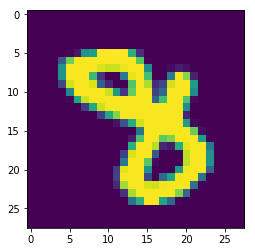

In [0]:
import matplotlib.pyplot as plt
plt.imshow(X_train[1].reshape(28,28,))

In [0]:
y_train[1]

8

In [0]:
import keras as keras
y_train = keras.utils.to_categorical(y_train)

Using TensorFlow backend.


In [0]:
y_test = keras.utils.to_categorical(y_test)
y_dev = keras.utils.to_categorical(y_dev)

In [0]:
#y_test[1]

In [0]:
X_train=X_train/255
X_test=X_test/255
X_dev=X_dev/255

# **Model**

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten,Dropout,BatchNormalization,Activation,MaxPooling2D
import keras
call=keras.callbacks.Callback()
hist=keras.callbacks.History()

model=Sequential()

model.add(Conv2D(128,kernel_size=3,padding='same',input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(128,kernel_size=3,padding='same',input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(Conv2D(128,kernel_size=3,padding='same',input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))

model.add(Conv2D(64,kernel_size=3,input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(64,kernel_size=3,padding='same',input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(Conv2D(64,kernel_size=3,padding='same',input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
model.add(Flatten())
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [0]:
from keras.optimizers import adam
from keras.callbacks import LearningRateScheduler
import math
def rate_adjust(epoch):
  initial=5e-4
  if(epoch==0):
    rate=initial
  else:
    rate=initial*math.pow(0.01,math.floor(epoch/5))
  return rate

lrate=LearningRateScheduler(rate_adjust)
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_dev,y_dev), epochs=20,callbacks=[hist,lrate], shuffle=True, batch_size=32)

Train on 37800 samples, validate on 2100 samples
Epoch 1/20
37800/37800 [==============================] - 483s 13ms/step - loss: 0.3285 - acc: 0.8944 - val_loss: 0.0798 - val_acc: 0.9767
Epoch 2/20
37800/37800 [==============================] - 479s 13ms/step - loss: 0.1061 - acc: 0.9709 - val_loss: 0.0614 - val_acc: 0.9824
Epoch 3/20
37800/37800 [==============================] - 478s 13ms/step - loss: 0.0819 - acc: 0.9778 - val_loss: 0.0577 - val_acc: 0.9805
Epoch 4/20
37800/37800 [==============================] - 476s 13ms/step - loss: 0.0612 - acc: 0.9823 - val_loss: 0.0542 - val_acc: 0.9857
Epoch 5/20
37800/37800 [==============================] - 477s 13ms/step - loss: 0.0540 - acc: 0.9849 - val_loss: 0.0416 - val_acc: 0.9886
Epoch 6/20
37800/37800 [==============================] - 476s 13ms/step - loss: 0.0330 - acc: 0.9908 - val_loss: 0.0289 - val_acc: 0.9924
Epoch 7/20
37800/37800 [==============================] - 474s 13ms/step - loss: 0.0283 - acc: 0.9921 - val_loss: 0.0

In [0]:
rate_adjust(7)

5e-06

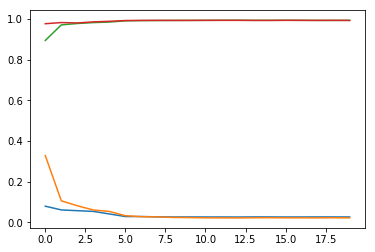

In [0]:
import matplotlib.pyplot as plt
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.show()

In [0]:
res=model.predict_classes(test)

In [0]:
model.evaluate(X_test,y_test)

2100/2100 [==============================] - 7s 3ms/step


[0.030515492761936738, 0.9923809523809524]

In [0]:
pand=pd.DataFrame(res)
pand.index.name='ImageId'
pand.index=pand.index+1

In [0]:
pand.to_csv("/content/drive/My Drive/Kaggle1/data/res.csv",index=True,header=['label'])

In [0]:
pand

,0
ImageId,
1,2
2,0
3,9
4,9
5,3
6,7
7,0
8,3
9,0
